In [20]:
import pandas as pd
import numpy as np
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

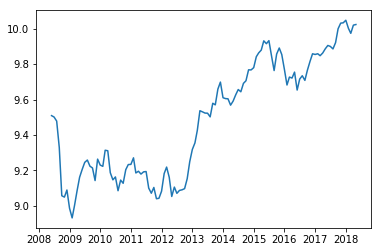

        Date  Price_Nikkei
0 2018-05-01     10.023379
1 2018-04-01     10.019842
2 2018-03-01      9.973680
3 2018-02-01     10.001895
4 2018-01-01     10.047514


In [11]:
def parser(x):
    d = datetime.strptime(x, '%b %y')
    return d

nk = pd.read_csv("Nikkei_monthly_10.csv", usecols=["Price_Nikkei", "Date"], parse_dates=[0], squeeze=True, date_parser=parser)
nk['Price_Nikkei'] = np.log(nk['Price_Nikkei'].str.replace(',','').astype(float))
plt.plot(nk['Date'], nk['Price_Nikkei'])
plt.show()
print(nk.head())


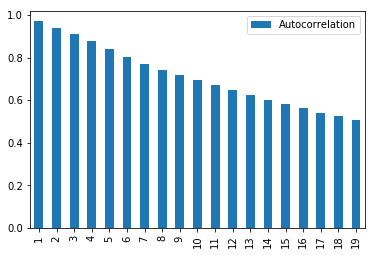

In [22]:
# Auto Corrilation function
acf_1 = acf(nk['Price_Nikkei'])[1:20]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.show()

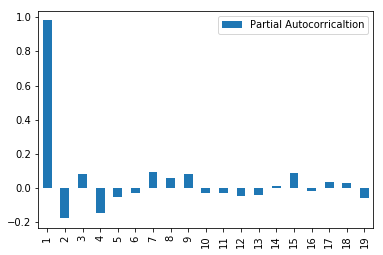

In [23]:
# Partial Auto Corrilation Function
pacf_1 = pacf(nk['Price_Nikkei'])[1:20]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Partial Autocorricaltion']
test_df.index += 1
test_df.plot(kind='bar')
plt.show()

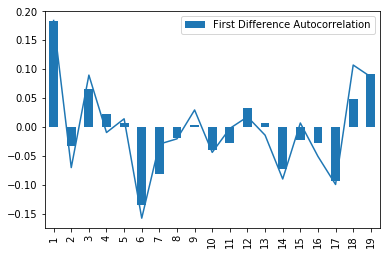

In [24]:
df1_diff = nk['Price_Nikkei'] - nk['Price_Nikkei'].shift()
diff = df1_diff.dropna()
acf_1_diff =  acf(diff)[1:20]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1_diff =  pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

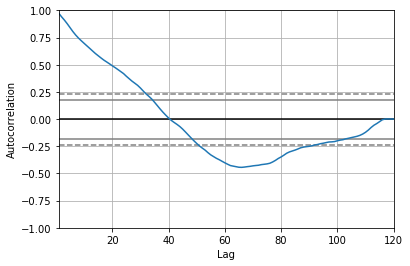

In [12]:
autocorrelation_plot(nk['Price_Nikkei'])
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  119
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 171.180
Method:                       css-mle   S.D. of innovations              0.057
Date:                Tue, 08 May 2018   AIC                           -328.360
Time:                        12:20:47   BIC                           -308.906
Sample:                             1   HQIC                          -320.460
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0040      0.007     -0.591      0.556      -0.017       0.009
ar.L1.D.y      0.2005      0.091      2.195      0.030       0.021       0.380
ar.L2.D.y     -0.0868      0.093     -0.933      0.3

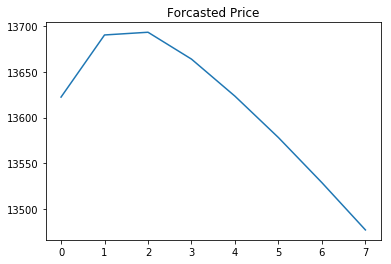

In [18]:
nk_matrix = nk['Price_Nikkei'].as_matrix()
model = ARIMA(nk_matrix, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
predictions = model_fit.predict(122, 127, typ='levels')
predictions_adjusted = np.exp(predictions)
plt.plot(predictions_adjusted)
plt.title('Forcasted Price')
plt.show()